In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
from scipy.stats import genextreme
from scipy.stats import gumbel_r
import matplotlib.pyplot as plt
import glob
import os
import seaborn as sns
import xarray as xr
from datetime import datetime

C:\Users\Nurul Nabila Fadiyah\anaconda3\lib\site-packages\xarray\backends\cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [2]:
datdir = 'D:\\[4] SEMESTER 8\\Bismillah TA\\DATA CH TAHUNAN\\'

In [3]:
ch_20th = pd.read_csv(datdir + 'ch_centroid_gpm.csv')
ch_20th

,centroid_0,centroid_1,centroid_2,centroid_3,centroid_4,centroid_5,centroid_6,centroid_7,centroid_8,centroid_9,...,centroid_84,centroid_85,centroid_86,centroid_87,centroid_88,centroid_89,centroid_90,centroid_91,centroid_92,Tanggal
0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,2000-05-31 17:00:00
1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,2000-05-31 17:30:00
2,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.011431,0.011431,0.0,0.000000,0.0,2000-05-31 18:00:00
3,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.018470,0.018470,0.0,0.000000,0.0,2000-05-31 18:30:00
4,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.034673,0.034673,0.0,0.000000,0.0,2000-05-31 19:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369595,0.032011,0.032011,0.009984,0.009984,0.0,0.852430,0.007737,0.007691,0.007691,0.00000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,2021-06-30 14:30:00
369596,0.032011,0.032011,0.000000,0.000000,0.0,0.852386,0.000000,0.007692,0.007692,0.00000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,2021-06-30 15:00:00
369597,0.032011,0.032011,0.000000,0.000000,0.0,0.461924,0.000000,0.004312,0.004312,0.00000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,2021-06-30 15:30:00
369598,0.017997,0.017997,0.000000,0.000000,0.0,0.305522,0.000000,0.003917,0.003917,0.11902,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,2021-06-30 16:00:00


In [4]:
ch_20th = ch_20th.reset_index()
ch_20th

,index,centroid_0,centroid_1,centroid_2,centroid_3,centroid_4,centroid_5,centroid_6,centroid_7,centroid_8,...,centroid_84,centroid_85,centroid_86,centroid_87,centroid_88,centroid_89,centroid_90,centroid_91,centroid_92,Tanggal
0,0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,2000-05-31 17:00:00
1,1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,2000-05-31 17:30:00
2,2,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.011431,0.011431,0.0,0.000000,0.0,2000-05-31 18:00:00
3,3,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.018470,0.018470,0.0,0.000000,0.0,2000-05-31 18:30:00
4,4,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.034673,0.034673,0.0,0.000000,0.0,2000-05-31 19:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369595,369595,0.032011,0.032011,0.009984,0.009984,0.0,0.852430,0.007737,0.007691,0.007691,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,2021-06-30 14:30:00
369596,369596,0.032011,0.032011,0.000000,0.000000,0.0,0.852386,0.000000,0.007692,0.007692,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,2021-06-30 15:00:00
369597,369597,0.032011,0.032011,0.000000,0.000000,0.0,0.461924,0.000000,0.004312,0.004312,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,2021-06-30 15:30:00
369598,369598,0.017997,0.017997,0.000000,0.000000,0.0,0.305522,0.000000,0.003917,0.003917,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,2021-06-30 16:00:00


In [5]:
ch_20th['Tanggal'] = pd.to_datetime(ch_20th['Tanggal'])
ch_20th = ch_20th.set_index('Tanggal')
ch_daily_20th = ch_20th.resample('D').sum()
ch_daily_20th

,index,centroid_0,centroid_1,centroid_2,centroid_3,centroid_4,centroid_5,centroid_6,centroid_7,centroid_8,...,centroid_83,centroid_84,centroid_85,centroid_86,centroid_87,centroid_88,centroid_89,centroid_90,centroid_91,centroid_92
Tanggal,,,,,,,,,,,,,,,,,,,,,
2000-05-31,91,0.000000,0.000000,0.000000,0.000000,0.000000,0.530951,8.155005,0.058690,0.058690,...,0.000000,0.111955,0.111955,0.000000,0.000000,0.458792,0.458792,0.097552,0.106348,0.230016
2000-06-01,1800,24.628614,24.628614,13.463860,13.463860,9.814989,42.885198,106.379558,16.725601,16.725601,...,32.675287,16.109102,16.109102,32.871389,26.950121,21.183459,21.183459,10.855677,10.741516,12.993298
2000-06-02,4104,1.735548,1.735548,16.616001,16.616001,15.511759,8.065154,19.915453,50.066151,50.066151,...,2.610669,2.825491,2.825491,2.638808,0.719481,1.546001,1.546001,3.665594,5.152387,2.589796
2000-06-03,6408,10.219136,10.219136,0.442329,0.442329,0.022444,12.411599,39.450804,27.821618,27.821618,...,17.381819,1.265927,1.265927,28.077206,8.131130,0.750480,0.750480,2.787917,5.162390,9.012947
2000-06-04,8712,38.198209,38.198209,8.659450,8.659450,7.696211,55.984459,33.305508,44.919593,44.919593,...,4.492265,0.151118,0.151118,3.833696,1.800067,0.052216,0.052216,18.190704,17.640212,18.841787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-26,17731080,38.521098,38.521098,6.093542,6.093542,14.637413,36.688359,33.680688,41.747737,41.747737,...,0.510818,1.306571,1.306571,0.542340,0.044493,2.590022,2.590022,11.263847,8.950805,6.588676
2021-06-27,17733384,9.819802,9.819802,29.037765,29.037765,21.649944,23.207768,67.031550,29.794479,29.794479,...,55.811403,7.355675,7.355675,11.327230,17.526685,14.160340,14.160340,12.037334,7.588785,11.651741
2021-06-28,17735688,21.364317,21.364317,20.367048,20.367048,22.379254,11.185682,47.592846,48.261959,48.261959,...,59.163219,93.543227,93.543227,60.649605,50.830645,73.602079,73.602079,33.256387,21.204310,28.713942


In [6]:
ch_daily_20th = ch_daily_20th.reset_index('Tanggal')
ch_daily_20th

,Tanggal,index,centroid_0,centroid_1,centroid_2,centroid_3,centroid_4,centroid_5,centroid_6,centroid_7,...,centroid_83,centroid_84,centroid_85,centroid_86,centroid_87,centroid_88,centroid_89,centroid_90,centroid_91,centroid_92
0,2000-05-31,91,0.000000,0.000000,0.000000,0.000000,0.000000,0.530951,8.155005,0.058690,...,0.000000,0.111955,0.111955,0.000000,0.000000,0.458792,0.458792,0.097552,0.106348,0.230016
1,2000-06-01,1800,24.628614,24.628614,13.463860,13.463860,9.814989,42.885198,106.379558,16.725601,...,32.675287,16.109102,16.109102,32.871389,26.950121,21.183459,21.183459,10.855677,10.741516,12.993298
2,2000-06-02,4104,1.735548,1.735548,16.616001,16.616001,15.511759,8.065154,19.915453,50.066151,...,2.610669,2.825491,2.825491,2.638808,0.719481,1.546001,1.546001,3.665594,5.152387,2.589796
3,2000-06-03,6408,10.219136,10.219136,0.442329,0.442329,0.022444,12.411599,39.450804,27.821618,...,17.381819,1.265927,1.265927,28.077206,8.131130,0.750480,0.750480,2.787917,5.162390,9.012947
4,2000-06-04,8712,38.198209,38.198209,8.659450,8.659450,7.696211,55.984459,33.305508,44.919593,...,4.492265,0.151118,0.151118,3.833696,1.800067,0.052216,0.052216,18.190704,17.640212,18.841787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7696,2021-06-26,17731080,38.521098,38.521098,6.093542,6.093542,14.637413,36.688359,33.680688,41.747737,...,0.510818,1.306571,1.306571,0.542340,0.044493,2.590022,2.590022,11.263847,8.950805,6.588676
7697,2021-06-27,17733384,9.819802,9.819802,29.037765,29.037765,21.649944,23.207768,67.031550,29.794479,...,55.811403,7.355675,7.355675,11.327230,17.526685,14.160340,14.160340,12.037334,7.588785,11.651741
7698,2021-06-28,17735688,21.364317,21.364317,20.367048,20.367048,22.379254,11.185682,47.592846,48.261959,...,59.163219,93.543227,93.543227,60.649605,50.830645,73.602079,73.602079,33.256387,21.204310,28.713942
7699,2021-06-29,17737992,28.683138,28.683138,7.920367,7.920367,18.617424,0.797841,21.194916,7.284491,...,6.359106,8.309531,8.309531,5.786549,7.671490,9.305229,9.305229,8.426659,6.926061,4.232857


In [7]:
# Membuat kolom baru yang hanya berisi tahun
ch_daily_20th['Tahun'] = ch_daily_20th['Tanggal'].dt.year
ch_daily_20th

,Tanggal,index,centroid_0,centroid_1,centroid_2,centroid_3,centroid_4,centroid_5,centroid_6,centroid_7,...,centroid_84,centroid_85,centroid_86,centroid_87,centroid_88,centroid_89,centroid_90,centroid_91,centroid_92,Tahun
0,2000-05-31,91,0.000000,0.000000,0.000000,0.000000,0.000000,0.530951,8.155005,0.058690,...,0.111955,0.111955,0.000000,0.000000,0.458792,0.458792,0.097552,0.106348,0.230016,2000
1,2000-06-01,1800,24.628614,24.628614,13.463860,13.463860,9.814989,42.885198,106.379558,16.725601,...,16.109102,16.109102,32.871389,26.950121,21.183459,21.183459,10.855677,10.741516,12.993298,2000
2,2000-06-02,4104,1.735548,1.735548,16.616001,16.616001,15.511759,8.065154,19.915453,50.066151,...,2.825491,2.825491,2.638808,0.719481,1.546001,1.546001,3.665594,5.152387,2.589796,2000
3,2000-06-03,6408,10.219136,10.219136,0.442329,0.442329,0.022444,12.411599,39.450804,27.821618,...,1.265927,1.265927,28.077206,8.131130,0.750480,0.750480,2.787917,5.162390,9.012947,2000
4,2000-06-04,8712,38.198209,38.198209,8.659450,8.659450,7.696211,55.984459,33.305508,44.919593,...,0.151118,0.151118,3.833696,1.800067,0.052216,0.052216,18.190704,17.640212,18.841787,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7696,2021-06-26,17731080,38.521098,38.521098,6.093542,6.093542,14.637413,36.688359,33.680688,41.747737,...,1.306571,1.306571,0.542340,0.044493,2.590022,2.590022,11.263847,8.950805,6.588676,2021
7697,2021-06-27,17733384,9.819802,9.819802,29.037765,29.037765,21.649944,23.207768,67.031550,29.794479,...,7.355675,7.355675,11.327230,17.526685,14.160340,14.160340,12.037334,7.588785,11.651741,2021
7698,2021-06-28,17735688,21.364317,21.364317,20.367048,20.367048,22.379254,11.185682,47.592846,48.261959,...,93.543227,93.543227,60.649605,50.830645,73.602079,73.602079,33.256387,21.204310,28.713942,2021
7699,2021-06-29,17737992,28.683138,28.683138,7.920367,7.920367,18.617424,0.797841,21.194916,7.284491,...,8.309531,8.309531,5.786549,7.671490,9.305229,9.305229,8.426659,6.926061,4.232857,2021


(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.]),
 [Text(0, -100.0, '−100'),
  Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600'),
  Text(0, 700.0, '700')])

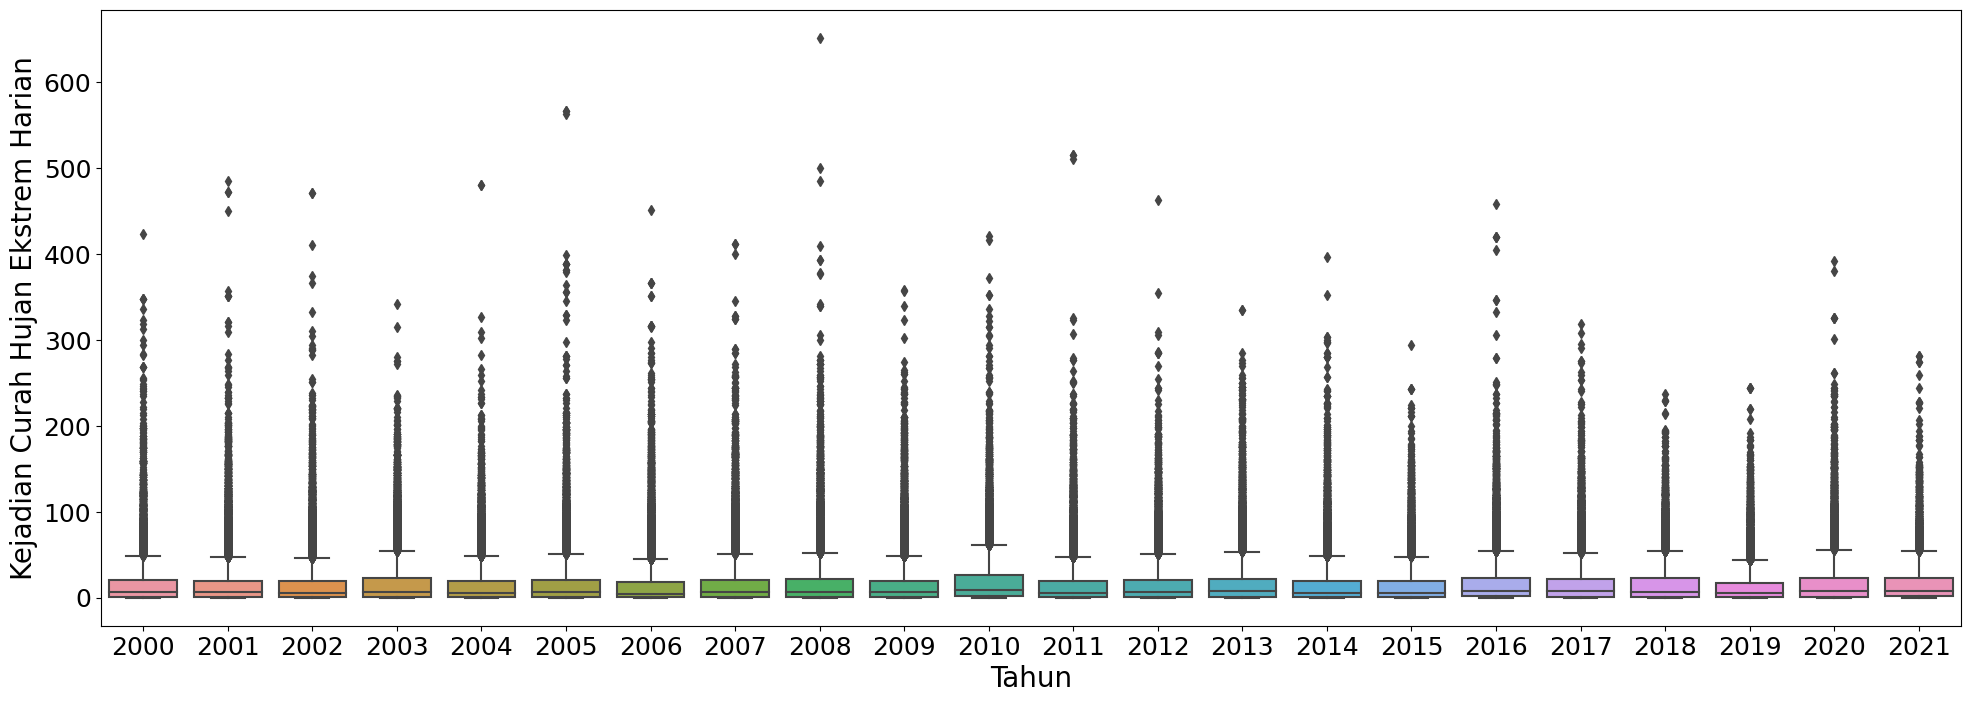

In [8]:
xxx = ch_daily_20th.drop(columns=['index', 'Tahun']).set_index('Tanggal').melt(ignore_index=False)[['value']]
fig = plt.figure(figsize=(24,8))
# plt.figure(figsize =(18, 8))
ax = sns.boxplot(
    data = xxx.assign(Tahun = xxx.index.year),
    x    = 'Tahun',
    y    = 'value'
)

# plt.rcParams["figure.dpi"] = 300
plt.xlabel("Tahun", size=20)
plt.ylabel("Kejadian Curah Hujan Ekstrem Harian", size=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# ax.set_title('Jumlah Curah Hujan Harian', fontsize=16, fontweight ="bold")
# plt.show()
#fig.savefig('D:/[4] SEMESTER 8/Bismillah TA/DATA CH TAHUNAN/Hasil_Plot/plot_boxplot_130cen.png',bbox_inches='tight',dpi=60)

In [9]:
xxx

,value
Tanggal,
2000-05-31,0.000000
2000-06-01,24.628614
2000-06-02,1.735548
2000-06-03,10.219136
2000-06-04,38.198209
...,...
2021-06-26,6.588676
2021-06-27,11.651741
2021-06-28,28.713942


In [10]:
xxx.quantile(.25)

value    0.986003
Name: 0.25, dtype: float64

In [11]:
pu_20th = pd.read_excel(datdir + 'PU_20th.xlsx')
pu_20th

,centroid_0,centroid_1,centroid_2,centroid_3,centroid_4,centroid_5,centroid_6,centroid_7,centroid_8,centroid_9,...,centroid_83,centroid_84,centroid_85,centroid_86,centroid_87,centroid_88,centroid_89,centroid_90,centroid_91,centroid_92
0,116.810815,116.810815,114.213654,114.213654,113.374407,85.239738,93.682422,85.684555,85.684555,91.356949,...,89.839973,87.607542,87.607542,96.317312,102.980742,98.676983,98.676983,94.640585,93.778578,94.750943
1,156.760765,156.760765,149.304346,149.304346,153.864704,111.393090,124.911295,111.488311,111.488311,116.153621,...,114.461797,105.234399,105.234399,123.270719,130.276649,126.749452,126.749452,120.972934,116.912392,123.115969
2,183.211108,183.211108,172.537437,172.537437,180.672805,128.708884,145.587526,128.572643,128.572643,132.571175,...,130.763588,116.904911,116.904911,141.116220,148.348915,145.335869,145.335869,138.407240,132.228990,141.896085
3,208.582912,208.582912,194.823177,194.823177,206.387778,145.318610,165.420663,144.960345,144.960345,148.319288,...,146.400656,128.099547,128.099547,158.234052,165.684266,163.164407,163.164407,155.130646,146.921038,159.910423
4,216.631186,216.631186,201.892510,201.892510,214.544910,150.587436,171.711999,150.158742,150.158742,153.314799,...,151.360943,131.650635,131.650635,163.664057,171.183271,168.819857,168.819857,160.435533,151.581552,165.624811
5,241.424110,241.424110,223.669780,223.669780,239.673173,166.818196,191.092625,166.172543,166.172543,168.703604,...,166.641238,142.589855,142.589855,180.391331,188.123100,186.241620,186.241620,176.777379,165.938388,183.228135
6,266.033966,266.033966,245.286250,245.286250,264.615892,182.929111,210.330148,182.068101,182.068101,183.978781,...,181.808705,153.448302,153.448302,196.995093,204.937849,203.534744,203.534744,192.998559,180.189215,200.701479


In [26]:
# pu_centroid = pd.read_excel(datdir + 'PU_20th.xlsx')
# pu_all = pd.DataFrame(pu_centroid).T
# pu_all = pu_all.set_axis(['T2', 'T5', 'T10', 'T20', 'T25', 'T50', 'T100'], axis=1)
# pu_all

In [12]:
pu_centroid_daily = pd.read_excel(datdir + 'PU_20th.xlsx')
pu_all_daily = pd.DataFrame(pu_centroid_daily).T
pu_all_daily = pu_all_daily.set_axis(['T2', 'T5', 'T10', 'T20', 'T25', 'T50', 'T100'], axis=1)
pu_all_daily

,T2,T5,T10,T20,T25,T50,T100
centroid_0,116.810815,156.760765,183.211108,208.582912,216.631186,241.424110,266.033966
centroid_1,116.810815,156.760765,183.211108,208.582912,216.631186,241.424110,266.033966
centroid_2,114.213654,149.304346,172.537437,194.823177,201.892510,223.669780,245.286250
centroid_3,114.213654,149.304346,172.537437,194.823177,201.892510,223.669780,245.286250
centroid_4,113.374407,153.864704,180.672805,206.387778,214.544910,239.673173,264.615892
...,...,...,...,...,...,...,...
centroid_88,98.676983,126.749452,145.335869,163.164407,168.819857,186.241620,203.534744
centroid_89,98.676983,126.749452,145.335869,163.164407,168.819857,186.241620,203.534744
centroid_90,94.640585,120.972934,138.407240,155.130646,160.435533,176.777379,192.998559
centroid_91,93.778578,116.912392,132.228990,146.921038,151.581552,165.938388,180.189215


In [13]:
(pu_all_daily.describe())

,T2,T5,T10,T20,T25,T50,T100
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,86.744320,110.610819,126.412518,141.569887,146.378006,161.189546,175.891720
std,13.299935,19.292504,23.453385,27.513864,28.811374,32.828865,36.839532
min,64.475916,77.255756,85.000375,92.429199,94.785721,102.045049,109.250776
25%,78.302949,97.241822,109.781004,121.028750,124.500717,135.477947,147.143290
50%,85.684555,109.901935,125.369933,139.774277,144.233654,157.970884,171.606680
75%,93.778578,120.972934,138.407240,155.617832,161.397488,179.201871,196.874790
max,116.810815,156.760765,183.211108,208.582912,216.631186,242.060577,268.414083


In [14]:
count_pu = (pu_all_daily.describe())
count_pu.drop(index=['25%', '50%', '75%', 'count'], axis=0)

,T2,T5,T10,T20,T25,T50,T100
mean,86.744320,110.610819,126.412518,141.569887,146.378006,161.189546,175.891720
std,13.299935,19.292504,23.453385,27.513864,28.811374,32.828865,36.839532
min,64.475916,77.255756,85.000375,92.429199,94.785721,102.045049,109.250776
max,116.810815,156.760765,183.211108,208.582912,216.631186,242.060577,268.414083


In [15]:
pu_all_daily.median()

T2       85.684555
T5      109.901935
T10     125.369933
T20     139.774277
T25     144.233654
T50     157.970884
T100    171.606680
dtype: float64

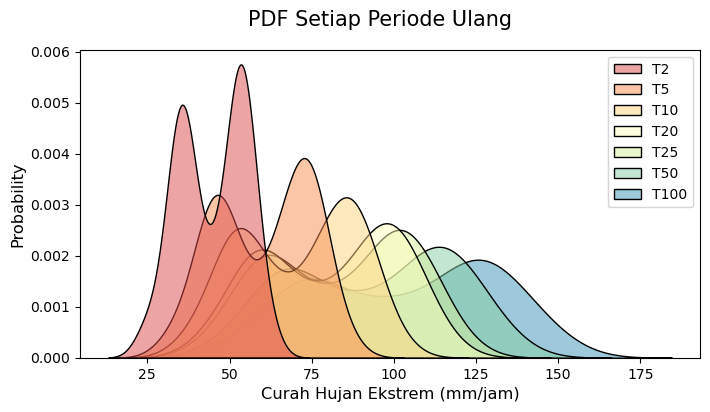

In [16]:
# #Plot PDF Periode Ulang Jam
# #########################
# fig = plt.figure(figsize = (8,4))
# #for i in enumerate (cols):   
# #plt.subplot(2,3,i[0]+1)
# ac = sns.kdeplot(data=pu_all, fill=True, edgecolor='k', palette = "Spectral", alpha = .5)
# plt.suptitle("PDF Setiap Periode Ulang", size = 15)
# plt.xlabel('Curah Hujan Ekstrem (mm/jam)', size = 11.7)
# plt.ylabel('Probability', size=11.7)
# fig.savefig('D:/[4] SEMESTER 8/Bismillah TA/DATA CH TAHUNAN/plot_pdf_130cen.png',bbox_inches='tight',dpi=60)

Text(0, 0.5, 'Probability')

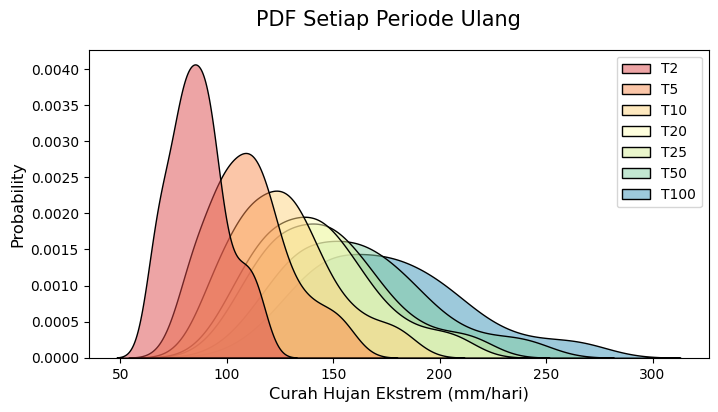

In [16]:
#Plot PDF PU Daily
#################################
fig = plt.figure(figsize = (8,4))
#for i in enumerate (cols):   
#plt.subplot(2,3,i[0]+1)
ac = sns.kdeplot(data=pu_all_daily, fill=True, edgecolor='k', palette = "Spectral", alpha = .5)
plt.suptitle("PDF Setiap Periode Ulang", size = 15)
plt.xlabel('Curah Hujan Ekstrem (mm/hari)', size = 11.7)
plt.ylabel('Probability', size=11.7)
#fig.savefig('D:/[4] SEMESTER 8/Bismillah TA/DATA CH TAHUNAN/Hasil_Plot/plot_pdf_daily_130cen.png',bbox_inches='tight',dpi=60)

In [15]:
pu_2year = pu_20th.iloc[0]
pu_2year

centroid_0     116.810815
centroid_1     116.810815
centroid_2     114.213654
centroid_3     114.213654
centroid_4     113.374407
                  ...    
centroid_90     98.676983
centroid_91     98.676983
centroid_92     94.640585
centroid_93     93.778578
centroid_94     94.750943
Name: 0, Length: 95, dtype: float64

In [18]:
pu_5year = pu_20th.iloc[1]
pu_5year

centroid_0     156.760765
centroid_1     156.760765
centroid_2     149.304346
centroid_3     149.304346
centroid_4     153.864704
                  ...    
centroid_88    126.749452
centroid_89    126.749452
centroid_90    120.972934
centroid_91    116.912392
centroid_92    123.115969
Name: 1, Length: 93, dtype: float64

In [20]:
# kejadian_lebihdari_pu20th = (ch_hour_20th.set_index('Tanggal').drop(columns=['index', 'Tahun']) > pu_2year)
# kejadian_lebihdari_pu20th = kejadian_lebihdari_pu20th.resample('Y').sum()
# kejadian_lebihdari_pu20th = kejadian_lebihdari_pu20th.sum(axis=1)
# kejadian_lebihdari_pu20th

In [19]:
kejadian_lebihdari_pu5th = (ch_daily_20th.set_index('Tanggal').drop(columns=['index', 'Tahun']) > pu_5year)
kejadian_lebihdari_pu5th = kejadian_lebihdari_pu5th.resample('Y').sum()
kejadian_lebihdari_pu5th = kejadian_lebihdari_pu5th.sum(axis=1)
kejadian_lebihdari_pu5th

Tanggal
2000-12-31    310
2001-12-31    465
2002-12-31    402
2003-12-31    451
2004-12-31    264
2005-12-31    429
2006-12-31    459
2007-12-31    538
2008-12-31    578
2009-12-31    396
2010-12-31    550
2011-12-31    361
2012-12-31    345
2013-12-31    442
2014-12-31    357
2015-12-31    198
2016-12-31    386
2017-12-31    358
2018-12-31    210
2019-12-31    155
2020-12-31    391
2021-12-31    174
Freq: A-DEC, dtype: int64

In [ ]:
# df_sum_kejadian = pd.DataFrame(kejadian_lebihdari_pu2th)
# df_sum_kejadian = df_sum_kejadian.rename(columns = {0:'Jumlah Kejadian'})

# df_all = pd.concat([df_sum_kejadian ], axis=1)
# df_kejadian = df_all.reset_index('Tanggal')
# df_kejadian

NameError: name 'kejadian_lebihdari_pu20th' is not defined

In [20]:
df_sum_5th = pd.DataFrame(kejadian_lebihdari_pu5th)
df_sum_5th = df_sum_5th.rename(columns = {0:'Jumlah Kejadian'})

df_all_5th = pd.concat([df_sum_5th], axis=1)
df_kejadian_5th = df_all_5th.reset_index('Tanggal')
df_kejadian_5th

,Tanggal,Jumlah Kejadian
0,2000-12-31,310
1,2001-12-31,465
2,2002-12-31,402
3,2003-12-31,451
4,2004-12-31,264
5,2005-12-31,429
6,2006-12-31,459
7,2007-12-31,538
8,2008-12-31,578
9,2009-12-31,396


In [19]:
# df_kejadian['Tahun'] = df_kejadian['Tanggal'].dt.year
# df_kejadian

In [21]:
df_kejadian_5th['Tahun'] = df_kejadian_5th['Tanggal'].dt.year
df_kejadian_5th

,Tanggal,Jumlah Kejadian,Tahun
0,2000-12-31,310,2000
1,2001-12-31,465,2001
2,2002-12-31,402,2002
3,2003-12-31,451,2003
4,2004-12-31,264,2004
5,2005-12-31,429,2005
6,2006-12-31,459,2006
7,2007-12-31,538,2007
8,2008-12-31,578,2008
9,2009-12-31,396,2009


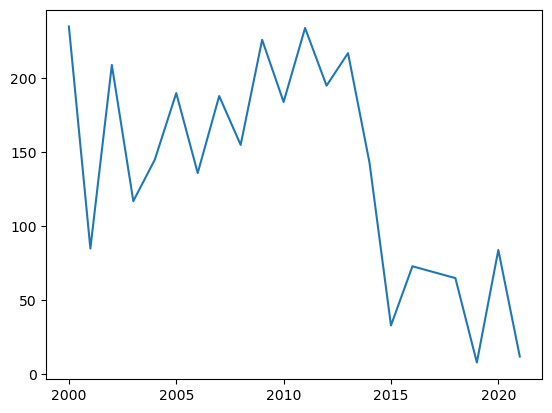

In [26]:
plt.plot(df_kejadian['Tahun'],df_kejadian['Jumlah Kejadian'])

Plotting Flash Flood Jumlah Kejadian


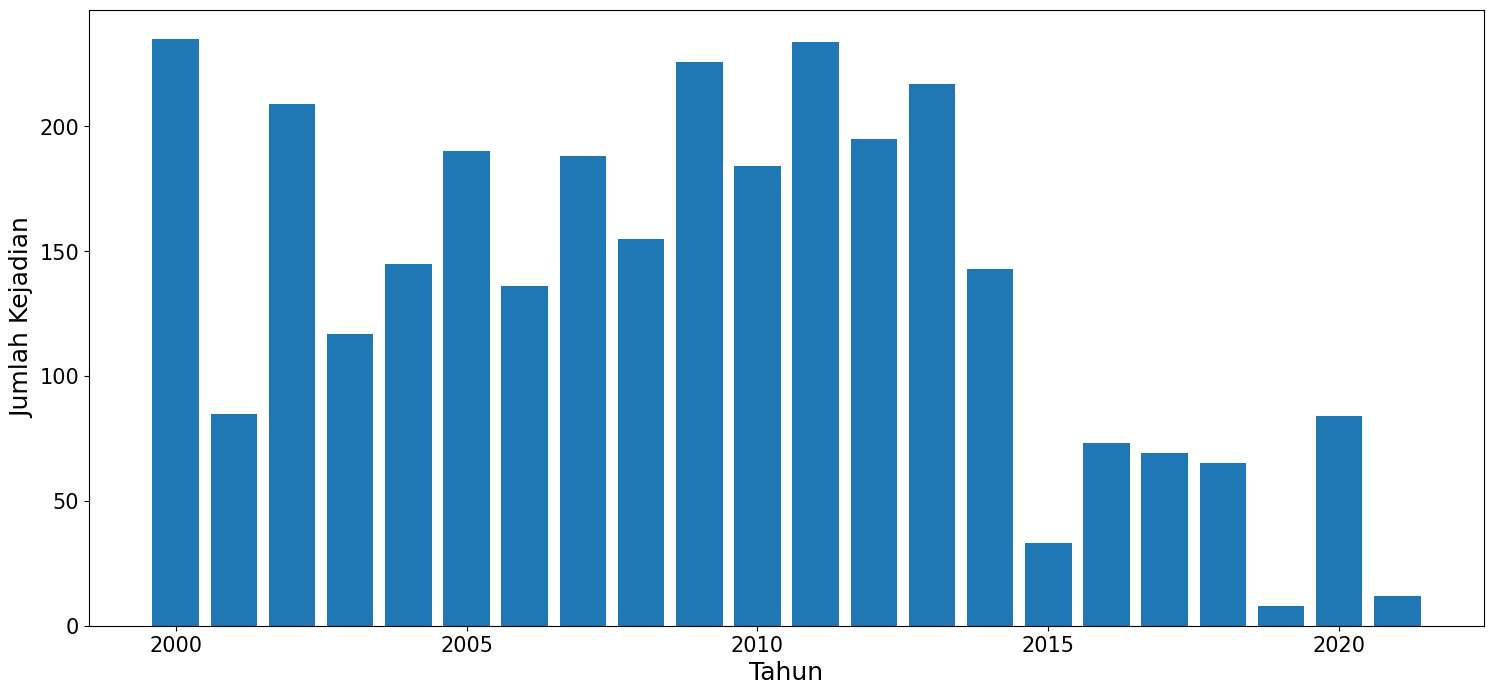

In [27]:
# print("Plotting Flash Flood Jumlah Kejadian")
# fig = plt.figure(figsize=(18,8))
# ax = fig.add_subplot(111)
# ax.bar(df_kejadian["Tahun"],df_kejadian["Jumlah Kejadian"])
# # t = df_kejadian["Tahun"]
# # h = df_kejadian["Jumlah Kejadian"]

# # ax = df_kejadian["Jumlah Kejadian"].plot.bar() 
# ax.tick_params(axis='both', which='major', labelsize=15)
# ax.set_xlabel('Tahun', fontsize=18)
# ax.set_ylabel('Jumlah Kejadian', fontsize=18)
# # ax.set_title('Jumlah Kejadian Banjir Bandang di 118 Titik Centroid Tahun 2000-2021 PU>2th', fontsize=24)
# fig.savefig('D:/[4] SEMESTER 8/Bismillah TA/DATA CH TAHUNAN/plot_2th.png',bbox_inches='tight',dpi=60)

Plotting Flash Flood Jumlah Kejadian


Text(0.5, 1.0, 'Jumlah Kejadian Curah Hujan Ekstrem Tahun 2000-2021 Berdasarkan PU>5th')

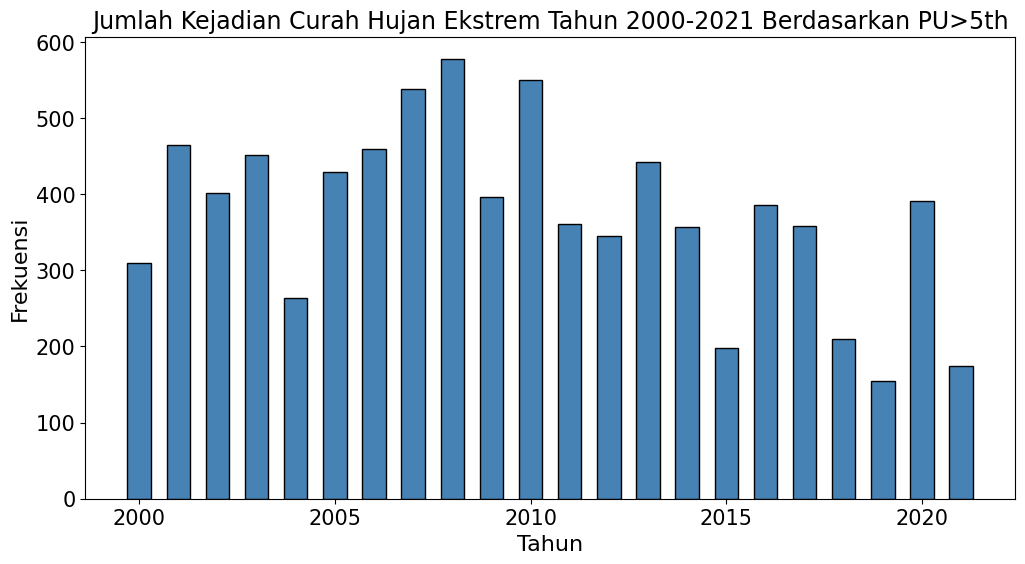

In [29]:
print("Plotting Flash Flood Jumlah Kejadian")
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.bar(df_kejadian_5th["Tahun"],df_kejadian_5th["Jumlah Kejadian"], width=0.6, color='steelblue', edgecolor='black')
# t = df_kejadian["Tahun"]
# h = df_kejadian["Jumlah Kejadian"]

# ax = df_kejadian["Jumlah Kejadian"].plot.bar() 
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlabel('Tahun', fontsize=16)
ax.set_ylabel('Frekuensi', fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_title('Jumlah Kejadian Curah Hujan Ekstrem Tahun 2000-2021 Berdasarkan PU>5th', fontsize=17)
# fig.savefig('D:/[4] SEMESTER 8/Bismillah TA/DATA CH TAHUNAN/Hasil_Plot/plot_5th_130cen.png',bbox_inches='tight',dpi=60)

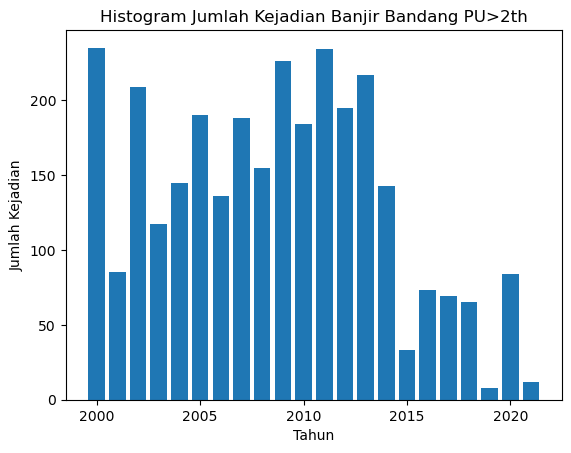

In [29]:
#plt.hist(bins[:-1], bins, weights=counts)
plt.bar(df_kejadian["Tahun"],df_kejadian["Jumlah Kejadian"])
t = df_kejadian["Tahun"]
h = df_kejadian["Jumlah Kejadian"]
#df_kejadian.plot.hist(x=t, y=h)

# set the axis labels and title
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kejadian')
plt.title('Histogram Jumlah Kejadian Banjir Bandang PU>2th')

# show the plot
plt.show()

### Akumulasi Banjir Bandang

In [31]:
centroid_data = pd.read_excel(datdir + "CentroidFF_06.xlsx")
centroid_data

,LABEL,geometry,tanggal,Centroid
0,1,POINT (100.49981049572239 -0.8650666211426935),2012-07-24,0
1,1,POINT (100.49413168718442 -0.8680840800275689),2015-05-14,1
2,1,POINT (100.27071241941778 -0.4574512281653418),2012-07-24,2
3,1,POINT (100.27071241941778 -0.4574512281653418),2018-12-10,3
4,1,POINT (100.18424377046533 -0.3120751452095314),2021-01-09,4
...,...,...,...,...
122,1,POINT (98.03031174590635 3.6737872935545814),2016-05-29,122
123,1,POINT (100.46392124290186 0.0158685865110505),2020-11-09,123
124,1,POINT (100.61110773467394 0.0430482643908401),2011-01-28,124
125,1,POINT (100.51552566384251 0.150740147492784),2020-07-22,125


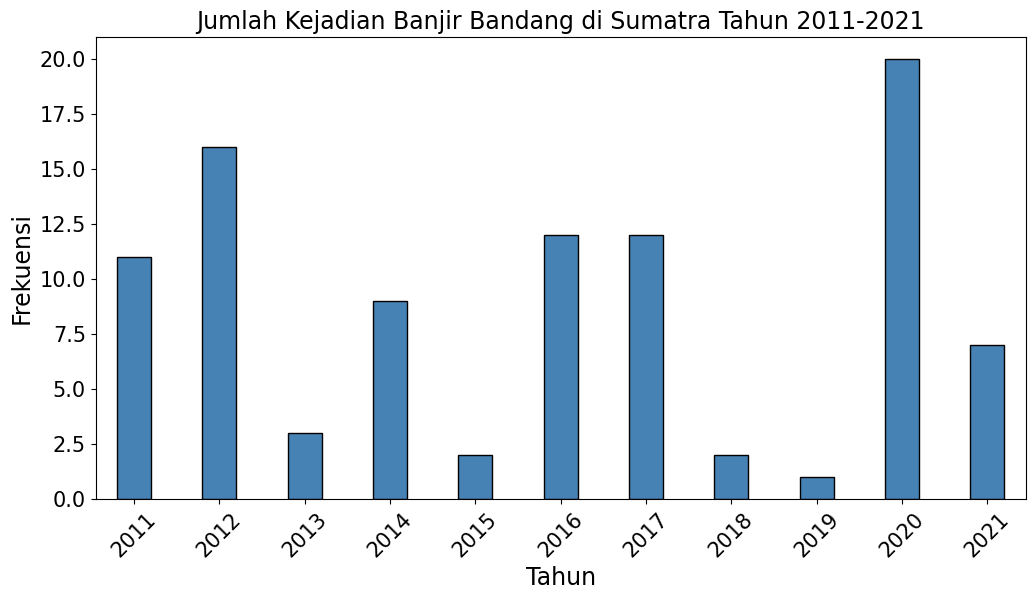

In [32]:
#Load Data
banjir_bandang  = pd.read_excel(datdir + "data_centroid_1k.xlsx")
banjir_bandang['Date'] = pd.to_datetime(banjir_bandang['Date'])

# Define plot space
fig, ax = plt.subplots(figsize=(12, 6))

# fig = plt.figure(figsize=(18,8))
banjir_bandang.groupby(banjir_bandang['Year'].astype(int)).count()['Lokasi'].plot.bar(ax, width=0.4, color='steelblue', edgecolor='black')
ax.set_title('Jumlah Kejadian Banjir Bandang di Sumatra Tahun 2011-2021', fontsize=17)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('Tahun', fontsize=17)
ax.set_ylabel('Frekuensi', fontsize=17)
ax.tick_params(axis='x', labelrotation=45, labelsize=15)
ax.tick_params(axis='y', labelsize=15)

Text(0.5, 1.0, 'Akumulasi Kejadian Banjir Bandang Pulau Sumatera Tahun 2011-2021')

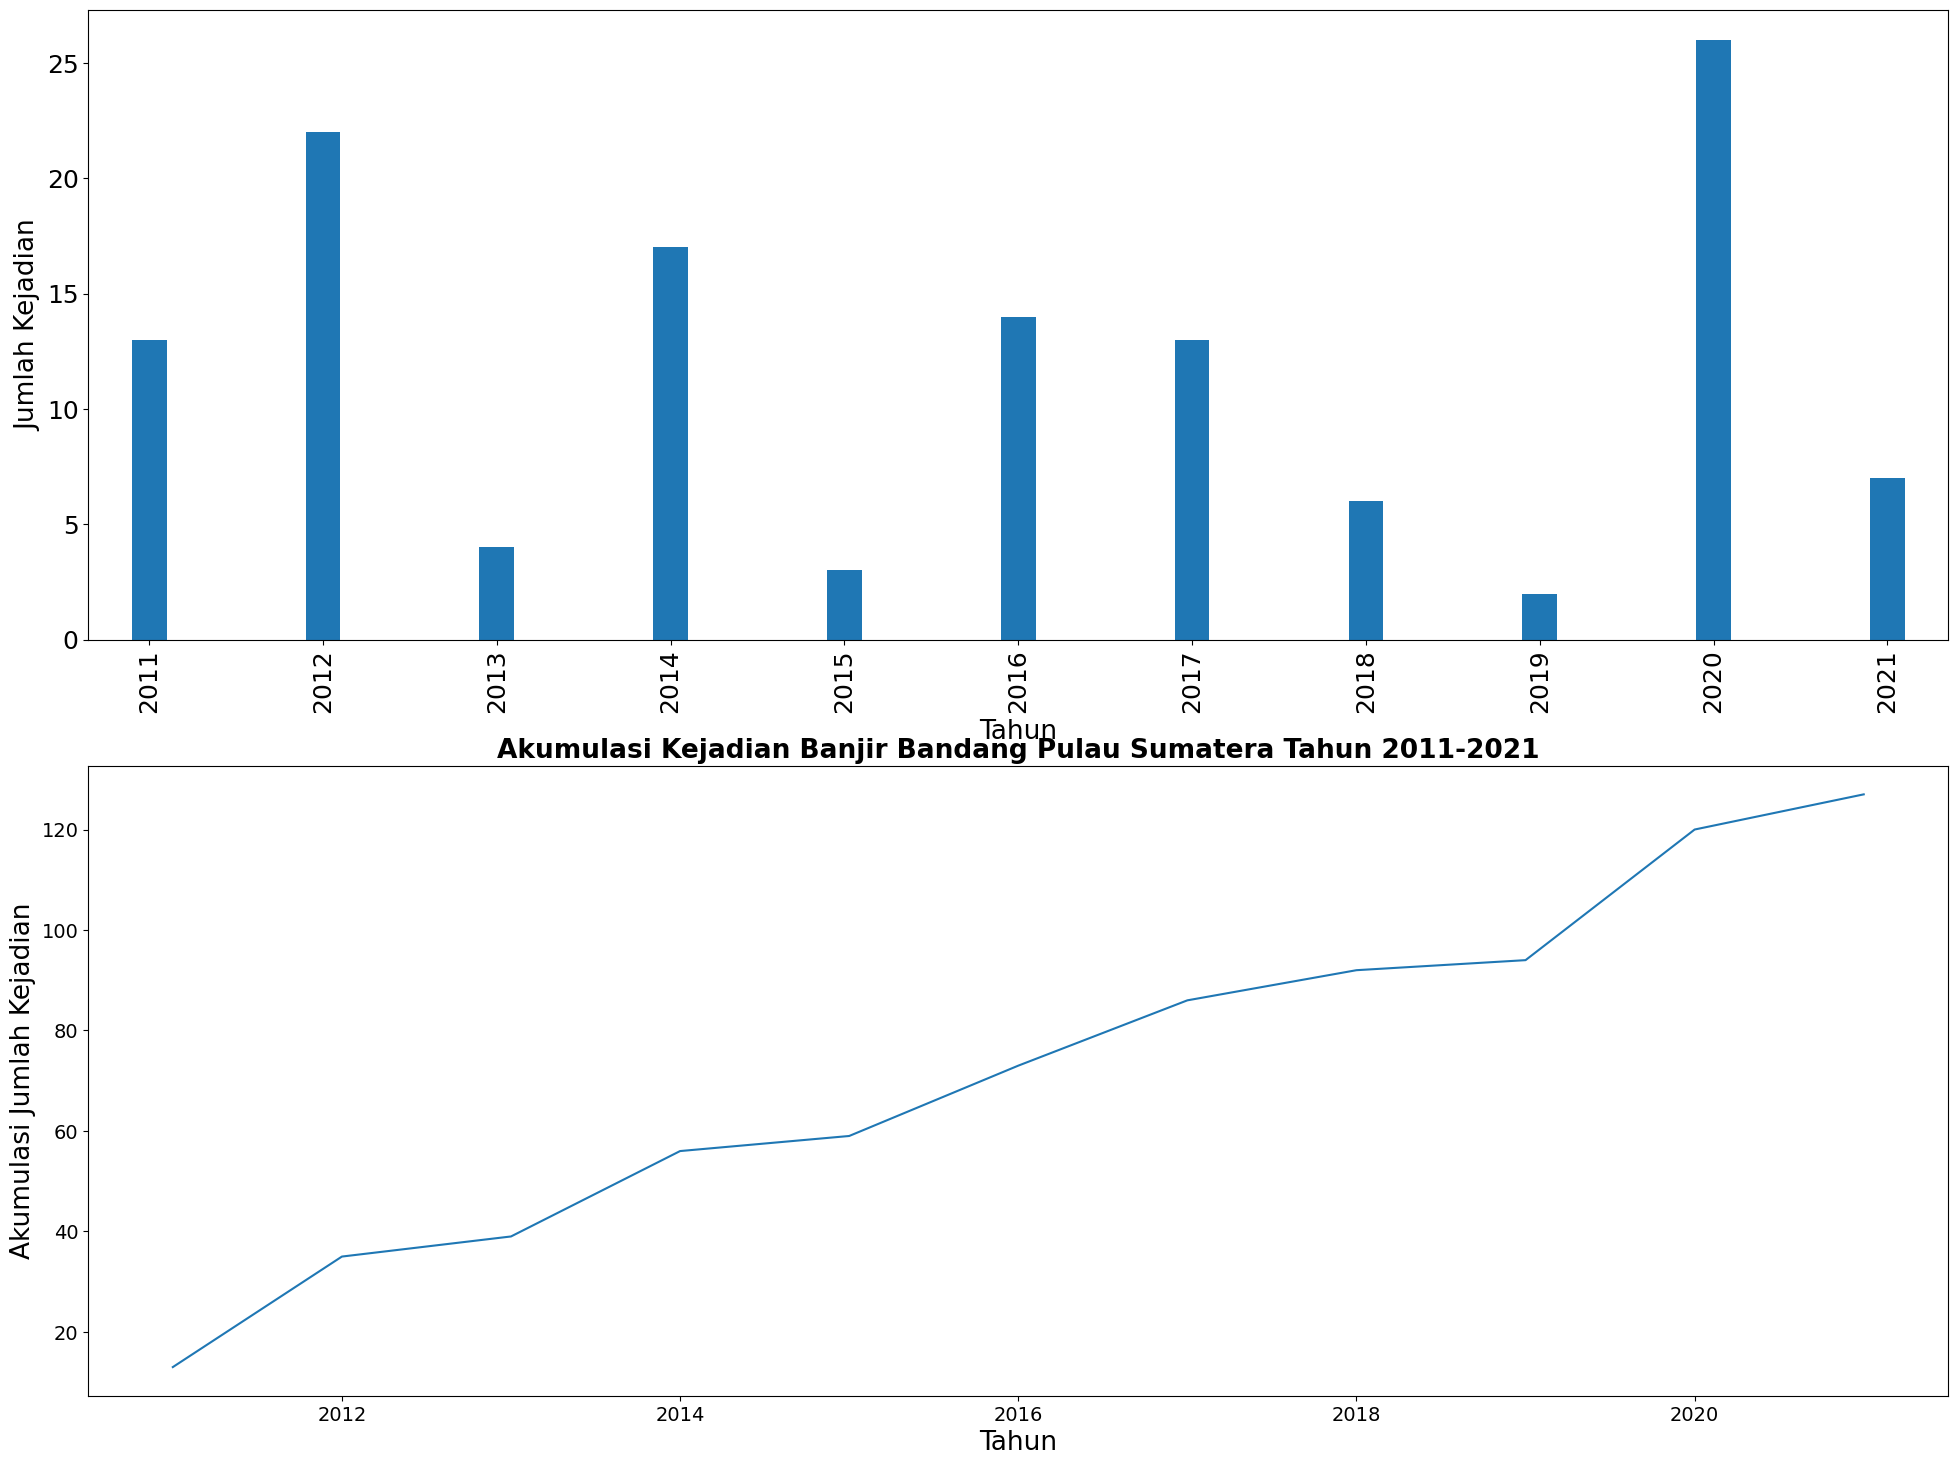

In [42]:
#Load Data
banjir_bandang  = pd.read_excel(datdir + "centroid_1km.xlsx")
banjir_bandang['Date'] = pd.to_datetime(banjir_bandang['Date'])

# Define plot space
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(24, 18))

# fig = plt.figure(figsize=(18,8))
banjir_bandang.groupby(banjir_bandang['Year'].astype(int)).count()['Lokasi'].plot.bar(ax = ax1, width=0.2)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.set_xlabel('Tahun', fontsize=19)
ax1.set_ylabel('Jumlah Kejadian', fontsize=19)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
# ax1.set_title('Kejadian Banjir Bandang di Pulau Sumatra Tahun 2011-2021', fontsize=19, fontweight ="bold")

# menambahkan kolom tahun ke dalam data frame
banjir_bandang['Year'] = banjir_bandang['Date'].dt.year

# menghitung jumlah kejadian per tahun
kejadian_per_tahun = banjir_bandang.groupby('Year')['Latitude'].count()

# menghitung akumulasi jumlah kejadian per tahun
akumulasi_kejadian_per_tahun = kejadian_per_tahun.cumsum()

ax2.plot(akumulasi_kejadian_per_tahun.index, akumulasi_kejadian_per_tahun.values )

# mengatur label sumbu x dan y
# ax2.set_xticks(fontsize=15)
# ax2.set_yticks(fontsize=15)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.set_xlabel('Tahun', fontsize=19)
ax2.set_ylabel('Akumulasi Jumlah Kejadian', fontsize=19)
ax2.set_title('Akumulasi Kejadian Banjir Bandang Pulau Sumatera Tahun 2011-2021', fontsize=19, fontweight ="bold" )

# menampilkan plot
# fig.savefig('D:/[4] SEMESTER 8/Bismillah TA/DATA CH TAHUNAN/plot_kejadianff_130cen.png',bbox_inches='tight',dpi=60)

In [33]:
banjir_bandang.head(1)

,Longitude,Latitude,Date,Year,Month,Days,Lokasi
0,100.49981,-0.865067,2012-07-24,2012,7,24,1


C:\Users\Nurul Nabila Fadiyah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Akumulasi Kejadian Banjir Bandang Pulau Sumatra Tahun 2011-2021')

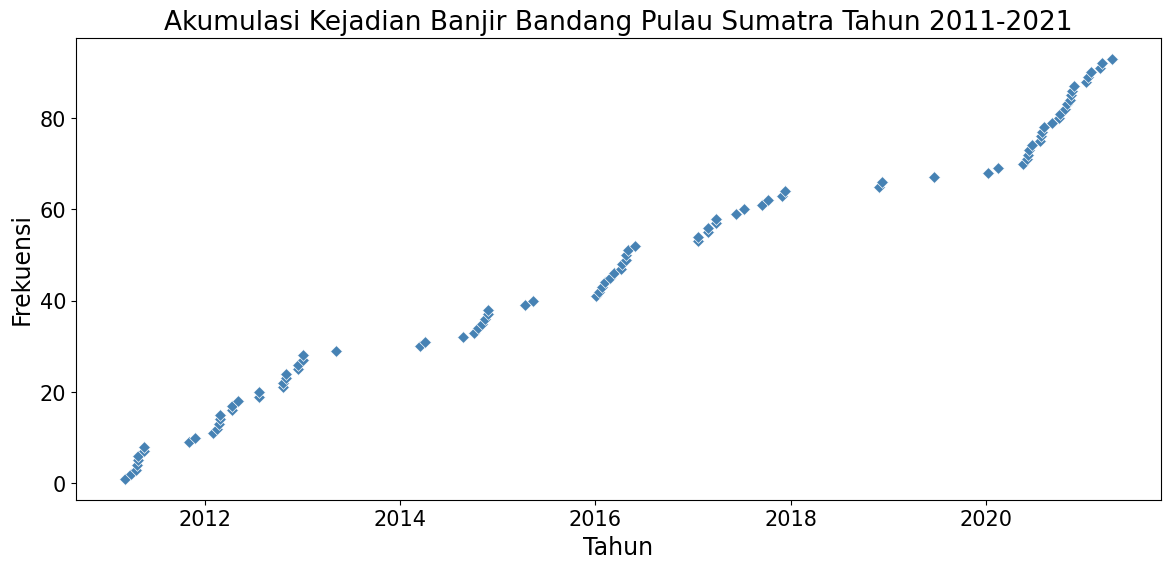

In [41]:
fig = plt.figure(figsize=(14,6))
no_index = banjir_bandang.sort_values('Date').reset_index()
sns.scatterplot(no_index.loc[1:93, 'Date'], (no_index.index[0:93])+1, marker='D', color='steelblue')

# set the axis labels and title
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Tahun', fontsize=17)
plt.ylabel('Frekuensi', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Akumulasi Kejadian Banjir Bandang Pulau Sumatra Tahun 2011-2021', fontsize=19)

# menampilkan plot
# fig.savefig('D:/[4] SEMESTER 8/Bismillah TA/DATA CH TAHUNAN/Hasil_Plot/akumulasi_plot_130cen.png',bbox_inches='tight',dpi=60)

In [ ]:
(no_index.index[1:164]), no_index.loc[0:164, 'Date']

NameError: name 'no_index' is not defined

C:\Users\Nurul Nabila Fadiyah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


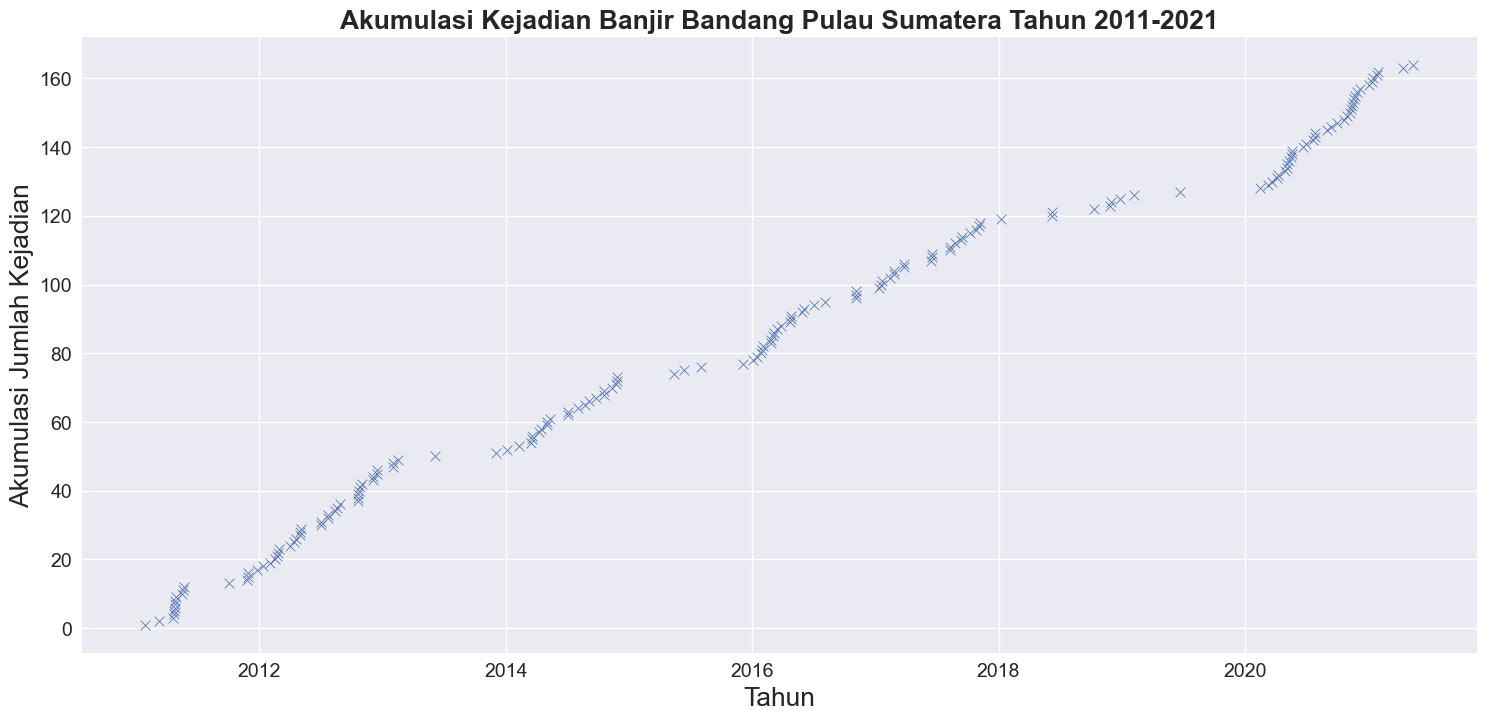

In [156]:
# fig = plt.figure(figsize=(18,8))
# no_index = banjir_bandang.sort_values('Date').reset_index()
# sns.scatterplot(no_index.loc[1:164, 'Date'], (no_index.index[0:164])+1, marker='x')

# # set the axis labels and title
# plt.tick_params(axis='both', which='major', labelsize=14)
# plt.xlabel('Tahun', fontsize=19)
# plt.ylabel('Akumulasi Jumlah Kejadian', fontsize=19)
# plt.title('Akumulasi Kejadian Banjir Bandang Pulau Sumatera Tahun 2011-2021', fontsize=19, fontweight ="bold")

# # menampilkan plot
# fig.savefig('D:/[4] SEMESTER 8/Bismillah TA/DATA CH TAHUNAN/Hasil_Plot/akumulasi_plot.png',bbox_inches='tight',dpi=60)

In [135]:
no_index.loc[1:164, 'Date']

1     2011-01-28
2     2011-03-11
3     2011-04-20
4     2011-04-24
5     2011-04-24
         ...    
160   2021-01-16
161   2021-01-28
162   2021-01-29
163   2021-04-15
164   2021-05-15
Name: Date, Length: 164, dtype: datetime64[ns]

Plotting Flash Flood Jumlah Kejadian


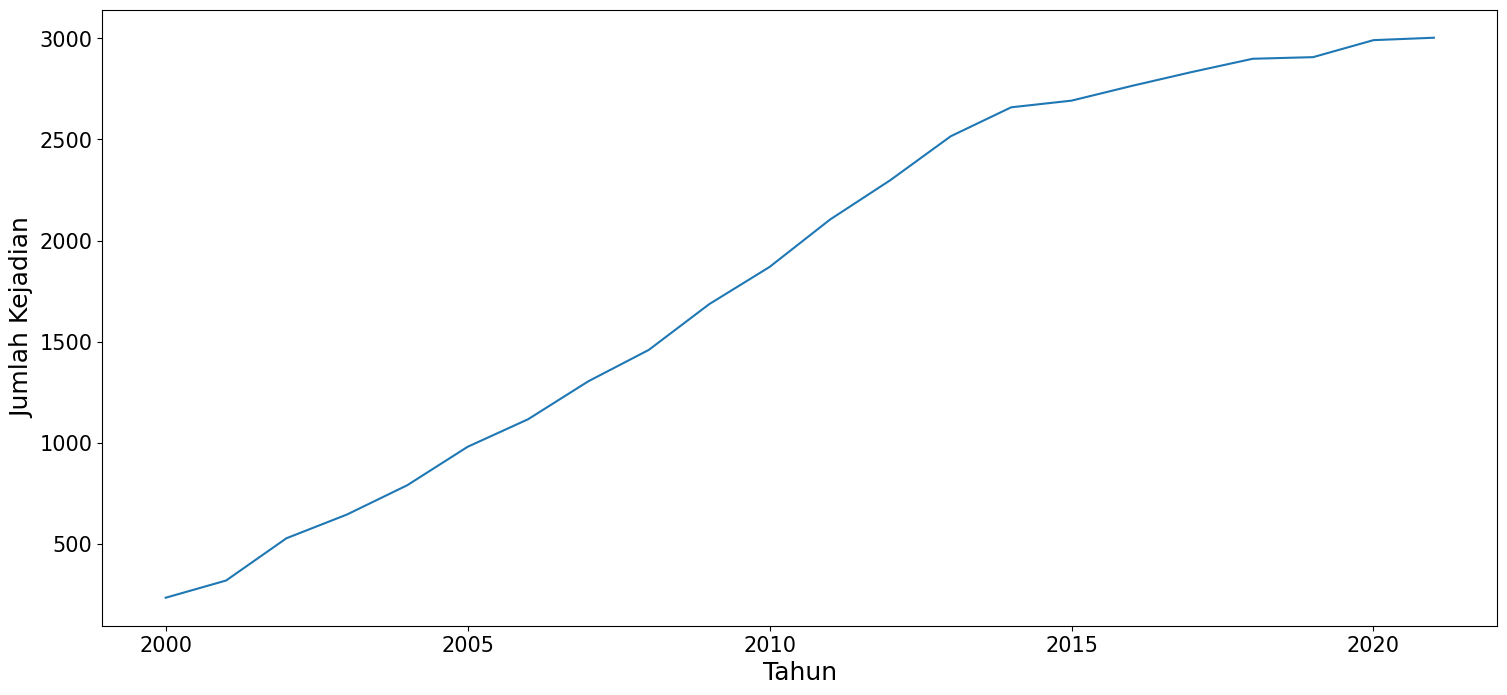

In [33]:
print("Plotting Flash Flood Jumlah Kejadian")
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(111)
akumulasi_per_tahun_2th = df_kejadian["Jumlah Kejadian"].cumsum()
ax.plot(df_kejadian["Tahun"],akumulasi_per_tahun_2th)
# t = df_kejadian["Tahun"]
# h = df_kejadian["Jumlah Kejadian"]

# ax = df_kejadian["Jumlah Kejadian"].plot.bar() 
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlabel('Tahun', fontsize=18)
ax.set_ylabel('Jumlah Kejadian', fontsize=18)
# ax.set_title('Akumulasi Curah Hujan di 118 Titik Centroid Tahun 2000-2021 PU>2th', fontsize=24)
fig.savefig('D:/[4] SEMESTER 8/Bismillah TA/DATA CH TAHUNAN/plot_akumulasi_2th.png',bbox_inches='tight',dpi=60)

Plotting Flash Flood Jumlah Kejadian


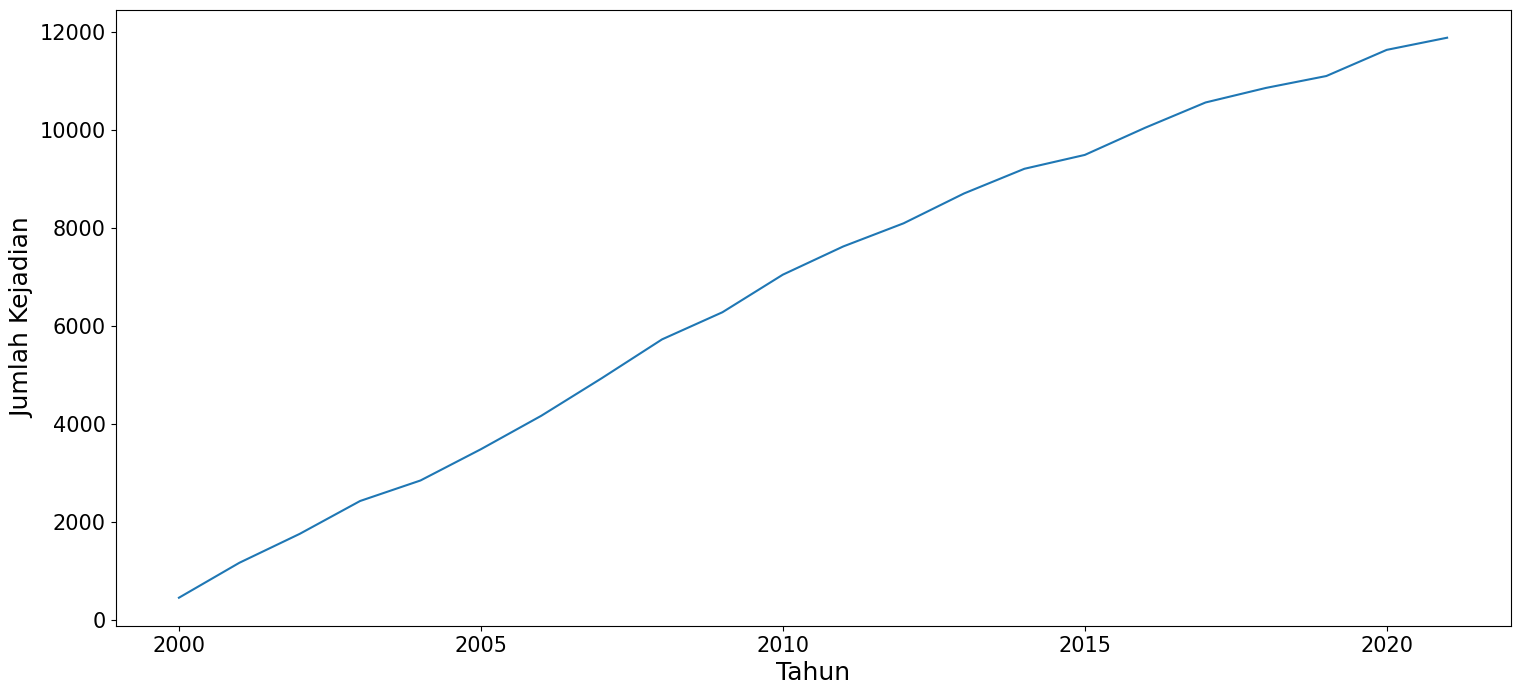

In [39]:
print("Plotting Flash Flood Jumlah Kejadian")
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(111)
akumulasi_per_tahun_5th = df_kejadian_5th["Jumlah Kejadian"].cumsum()
ax.plot(df_kejadian_5th["Tahun"],akumulasi_per_tahun_5th)
# t = df_kejadian["Tahun"]
# h = df_kejadian["Jumlah Kejadian"]

# ax = df_kejadian["Jumlah Kejadian"].plot.bar() 
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlabel('Tahun', fontsize=18)
ax.set_ylabel('Jumlah Kejadian', fontsize=18)
# ax.set_title('Akumulasi Curah Hujan di 118 Titik Centroid Tahun 2000-2021 PU>5th', fontsize=24)
fig.savefig('D:/[4] SEMESTER 8/Bismillah TA/DATA CH TAHUNAN/Hasil_Plot/plot_akumulasi_5th_130cen.png',bbox_inches='tight',dpi=60)